In [1]:
# example using mnist dataset
from sklearn.manifold import TSNE
import pandas as pd
from torchvision import datasets

# temp = datasets.MNIST(root='.', download=True)


# preprocess

In [2]:
filelist = ['/mnt/Face_Private-NFS/mhkim/swap//Oulu_align/simpleswapping_2/', '/mnt/Face_Private-NFS/mhkim/swap//Oulu_align/test_align/']

test_dir1a = '/mnt/tmp/MSU-MFSD/split_frames/train/attack/'
test_dir1r = '/mnt/tmp/MSU-MFSD/split_frames/train/real/'
test_dir2a = '/mnt/tmp/OULU_ImageFolder/images/test/attack/'
test_dir2r = '/mnt/tmp/OULU_ImageFolder/images/test/real/'
test_dir3a = '/mnt/tmp/SiW/test/attack/'
test_dir3r = '/mnt/tmp/SiW/test/real/'
test_dir4a = '/mnt/tmp/Idiap_frames/test/attack/fixed/'
test_dir4aa = '/mnt/tmp/Idiap_frames/test/attack/hand/'
test_dir4r = '/mnt/tmp/Idiap_frames/test/real/'



In [79]:
import glob
import cv2
import numpy as np
n_item = 500
syn_list = []
for f in filelist :
    ls = glob.glob(f+'*_5.jpg.png') + glob.glob(f+'*_5.jpg')
    n_iter = len(ls)//(n_item+1)
    cnt =0

    while(cnt<n_item):
        fn = ls[n_iter * cnt]
        cnt += 1
        syn_list.append(fn)
np.save('syn_attack5_1000', syn_list)

In [ ]:
np.load('syn_attack_MSU_60')

# DA

In [6]:
nparr = nparr.tolist()

## real vs synthesized real

In [3]:
import cv2
import numpy as np
nparr = np.load('./real_Idiap_600.npy').tolist()+np.load('./real_SiW_600.npy').tolist()+np.load('./real_OULU_600.npy').tolist()+np.load('./real_MSU_600.npy').tolist()
realr = np.load('./syn_real_1000.npy')
# nparr = np.load('./syn_attack_.npy'); realr = np.load('./syn_real_Idiap_600.npy')
syn_real_Idiap_600 = []; syn_attack_Idiap_600 = []
syn_real_Idiap_target = []; syn_attack_Idiap_target = []
for na in realr:
    img = cv2.imread(na)
    syn_real_Idiap_600.append(img.transpose((2,0,1)).flatten())
    syn_real_Idiap_target.append(1)

for na in nparr:
    img = cv2.imread(na)
    syn_attack_Idiap_600.append(img.transpose((2,0,1)).flatten())
    syn_attack_Idiap_target.append(0)

In [4]:
import random
random.shuffle(syn_attack_Idiap_600)
syn_real_Idiap_600 = syn_real_Idiap_600[:1000]
syn_attack_Idiap_600 = syn_attack_Idiap_600[:1000]
syn_attack_Idiap_target = syn_attack_Idiap_target[:1000]

In [5]:
from sklearn.preprocessing import StandardScaler
# normalizing pixel values
print("Normalizing")
imagesN = StandardScaler().fit_transform(syn_attack_Idiap_600 + syn_real_Idiap_600)
# processedN = StandardScaler().fit_transform(processedF)

Normalizing


In [55]:
#import the PCA algorithm from sklearn
from sklearn.decomposition import PCA
#run it with 15 components
pca = PCA(n_components=15, whiten=True)
#fit it to our data
pca.fit(imagesN)
#extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

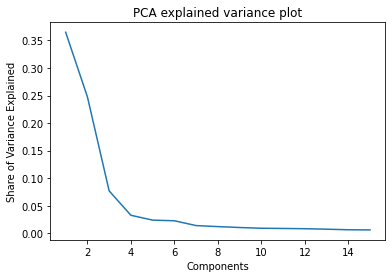

In [56]:
import matplotlib.pyplot as plt #create an x for each component
x = np.arange(1,len(explained_variance)+1)
#plot the results
plt.plot(x, explained_variance)
#add a y label
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
#show the resuling plot
plt.show()

In [6]:
#import the method
from sklearn.manifold import TSNE
#set the hyperparmateres
keep_dims = 2
lrn_rate = 700
prp = 40
#extract the data as a cop
tsnedf = imagesN.copy()
#creae the model
tsne = TSNE(n_components = keep_dims, 
            perplexity = prp, 
            random_state = 42,
            n_iter = 1000,
            n_jobs = -1)
#apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
#check the shape
X_dimensions.shape
#out:

(2000, 2)

<AxesSubplot:>

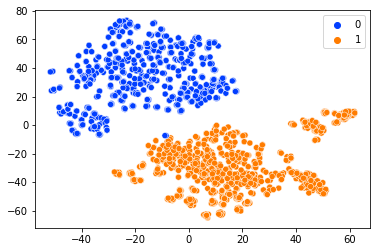

In [7]:
import seaborn as sns
palette = sns.color_palette("bright", 2)
target = syn_real_Idiap_target + syn_attack_Idiap_target
sns.scatterplot(x=X_dimensions[:,0], y=X_dimensions[:,1], hue=target, legend='full', palette=palette)

In [10]:
import cv2
import numpy as np
nparr = np.load('./attack_Idiap_600.npy').tolist()+np.load('./attack_SiW_600.npy').tolist()+np.load('./attack_OULU_600.npy').tolist()+np.load('./attack_MSU_600.npy').tolist()
realr = np.load('./syn_attack2_1000.npy').tolist()+np.load('./syn_attack3_1000.npy').tolist()+np.load('./syn_attack4_1000.npy').tolist()+np.load('./syn_attack5_1000.npy').tolist()
# nparr = np.load('./syn_attack_.npy'); realr = np.load('./syn_real_Idiap_600.npy')
syn_real_Idiap_600 = []; syn_attack_Idiap_600 = []
syn_real_Idiap_target = []; syn_attack_Idiap_target = []
for na in realr:
    img = cv2.imread(na)
    syn_real_Idiap_600.append(img.transpose((2,0,1)).flatten())
    syn_real_Idiap_target.append(1)

for na in nparr:
    img = cv2.imread(na)
    syn_attack_Idiap_600.append(img.transpose((2,0,1)).flatten())
    syn_attack_Idiap_target.append(0)

In [11]:
import random
random.shuffle(syn_attack_Idiap_600)
random.shuffle(syn_real_Idiap_600)
syn_real_Idiap_600 = syn_real_Idiap_600[:1000]
syn_real_Idiap_target = syn_real_Idiap_target[:1000] 
syn_attack_Idiap_600 = syn_attack_Idiap_600[:1000]
syn_attack_Idiap_target = syn_attack_Idiap_target[:1000]

In [12]:
from sklearn.preprocessing import StandardScaler
# normalizing pixel values
print("Normalizing")
imagesN = StandardScaler().fit_transform(syn_attack_Idiap_600 + syn_real_Idiap_600)
# processedN = StandardScaler().fit_transform(processedF)

Normalizing


In [13]:
#import the method
from sklearn.manifold import TSNE
#set the hyperparmateres
keep_dims = 2
lrn_rate = 700
prp = 40
#extract the data as a cop
tsnedf = imagesN.copy()
#creae the model
tsne = TSNE(n_components = keep_dims, 
            perplexity = prp, 
            random_state = 42,
            n_iter = 1000,
            n_jobs = -1)
#apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
#check the shape
X_dimensions.shape
#out:

<AxesSubplot:>

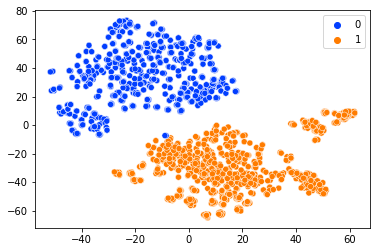

In [ ]:
import seaborn as sns
palette = sns.color_palette("bright", 2)
target = syn_real_Idiap_target + syn_attack_Idiap_target
sns.scatterplot(x=X_dimensions[:,0], y=X_dimensions[:,1], hue=target, legend='full', palette=palette)

<AxesSubplot:>

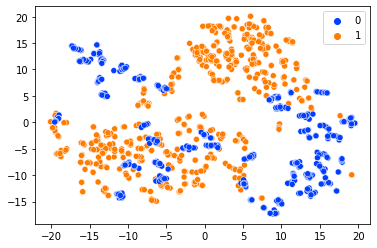

In [ ]:
import seaborn as sns
palette = sns.color_palette("bright", 2)
target = syn_real_Idiap_target + syn_attack_Idiap_target
sns.scatterplot(x=X_dimensions[:,0], y=X_dimensions[:,1], hue=target, legend='full', palette=palette)

In [50]:
#create a dataframe from the dataset
tsnedf_res = pd.DataFrame(data = X_dimensions,
                         columns = ["Dimension 1", 
                                "Dimension 2"])

In [ ]:

df = pd.DataFrame(temp.data.tolist())
# temp.data.shape
df = pd.DataFrame(temp.data.flatten(start_dim=1).numpy())
df = df[:10000]
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df)
